# Titanic - Machine Learning from Disaster

Kaggle has a competition for practising data science and this is my attempt at it. The aim is to predict which passengers from a dataset of certain Titanic passengers survived, based on the data in the set.

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Importing data

Import the training data

In [267]:
train_data = pd.read_csv("CSV/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Import the test data

In [268]:
test_data = pd.read_csv("CSV/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data wrangling

The data for sex is noted in text, however to be able to get some more informaiton from it it would be helpful for it to be an integer. Therefore we can add a column on the end to create this.

In [269]:
#Create a new dataframe so we don't change the original data frame
df_train = train_data.copy()

#Turn the sex data into an integer so that we can see this data compared to others. The sex data only contains 
#male or female results so we can just check for one.
df_train["SexB"] = np.where(df_train["Sex"] == "male",int(0),int(1))

#Turn the Embarked data into an integer so that we can see this data compared to others.
df_train["EmbarkedB"] = np.where(df_train["Embarked"] == "S",int(0),
                                 np.where(df_train["Embarked"] == "C",int(1),
                                          np.where(df_train["Embarked"] == "Q",int(2),np.nan)))
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexB,EmbarkedB
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1.0


## Missing values

And find out which columns don't have data in them.

In [270]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
SexB             0
EmbarkedB        2
dtype: int64

A large number of the age cells are missing a value. If age is a factor ths will not be helpful in training the model. Therefore we can write a definition to find an approx age and put it in the dataframe.

Cabin is also missing from the mahority of rows, therefore this column is probably not going to be helpful and we won't try to fill in the missing values. 

Embarked noted which port the passengers got on from. Only two cells are missing, so we will ignore this.

Running through a few different plots of different columns of the dataframe we could see that class had an effect on age, however so too does the number of siblings/spouses people have. 

<Axes: xlabel='SibSp', ylabel='Age'>

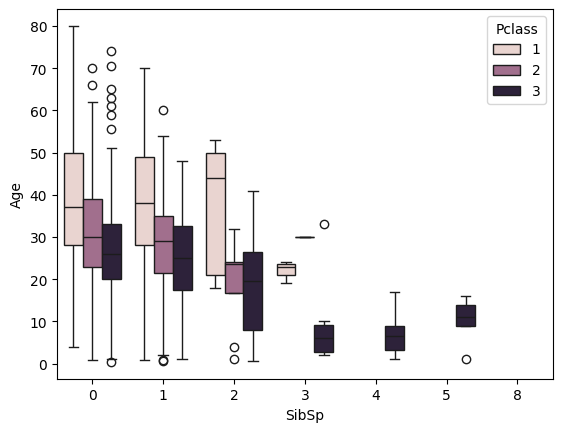

In [271]:
#A plot of the spread of ages for different sibling/spouse numbers per class
sns.boxplot(y=df_train["Age"],x=df_train["SibSp"],hue=df_train["Pclass"])

Create a function to replace the missing values based on the average class and number of siblings/spouses for a row. Once we got over 5 siblings there wasn't an equivalent, so we just used the average age for anyone with over 3 siblings in the same class. 

In [272]:
#Define a function to replace the missing values in the column.
def impute_missing_age(columns):

    age = columns.iloc[0]
    passenger_class = columns.iloc[1]
    sibling_spose = columns.iloc[2]
    
    if pd.isnull(age):
        if (sibling_spose <= 5):
            return round(df_train[(df_train["Pclass"] == passenger_class) & (df_train["SibSp"] == sibling_spose)]["Age"].mean(),1)
        elif (sibling_spose > 5):
            return round(df_train[(df_train["Pclass"] == passenger_class) & (df_train["SibSp"] >= 3)]["Age"].mean(),1)
    else:
        return age


Apply the function to the dataframe and check the missing values again.

In [273]:
#Apply it to every row in the Dataframe
df_train['Age'] = df_train[["Age","Pclass","SibSp"]].apply(impute_missing_age, axis = 1)

#Check the missing values again
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
SexB             0
EmbarkedB        2
dtype: int64

## Data assessment

Lets have a look at the column data, some basic takeaways are:
- Just over a third of passengers survive
- The mean age was 29 years, with the yougest being less than a year and the oldest being 80
- The mean fare was 32, but the highest fare was 512
- The majprity of people boarded at Southampton

In [274]:
#Get a description of the dataframe
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexB,EmbarkedB
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,29.385825,0.523008,0.381594,32.204208,0.352413,0.362205
std,257.353842,0.486592,0.836071,13.375770,1.102743,0.806057,49.693429,0.477990,0.636157
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,27.600000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


Use seaborn to have a look at the data in graphical form. From this we can see that:
- More class 1 passengers survived rather than died
- Being older or younger meant you were more likely to survive
- Having just one sibling/spose or parent appears to help you survive
- As your fare increased, you were more likely to survive. Also very low fares increased the likelyhood of survival
- More women survived than died
- More people who boarded at Cherbourg survived than died.

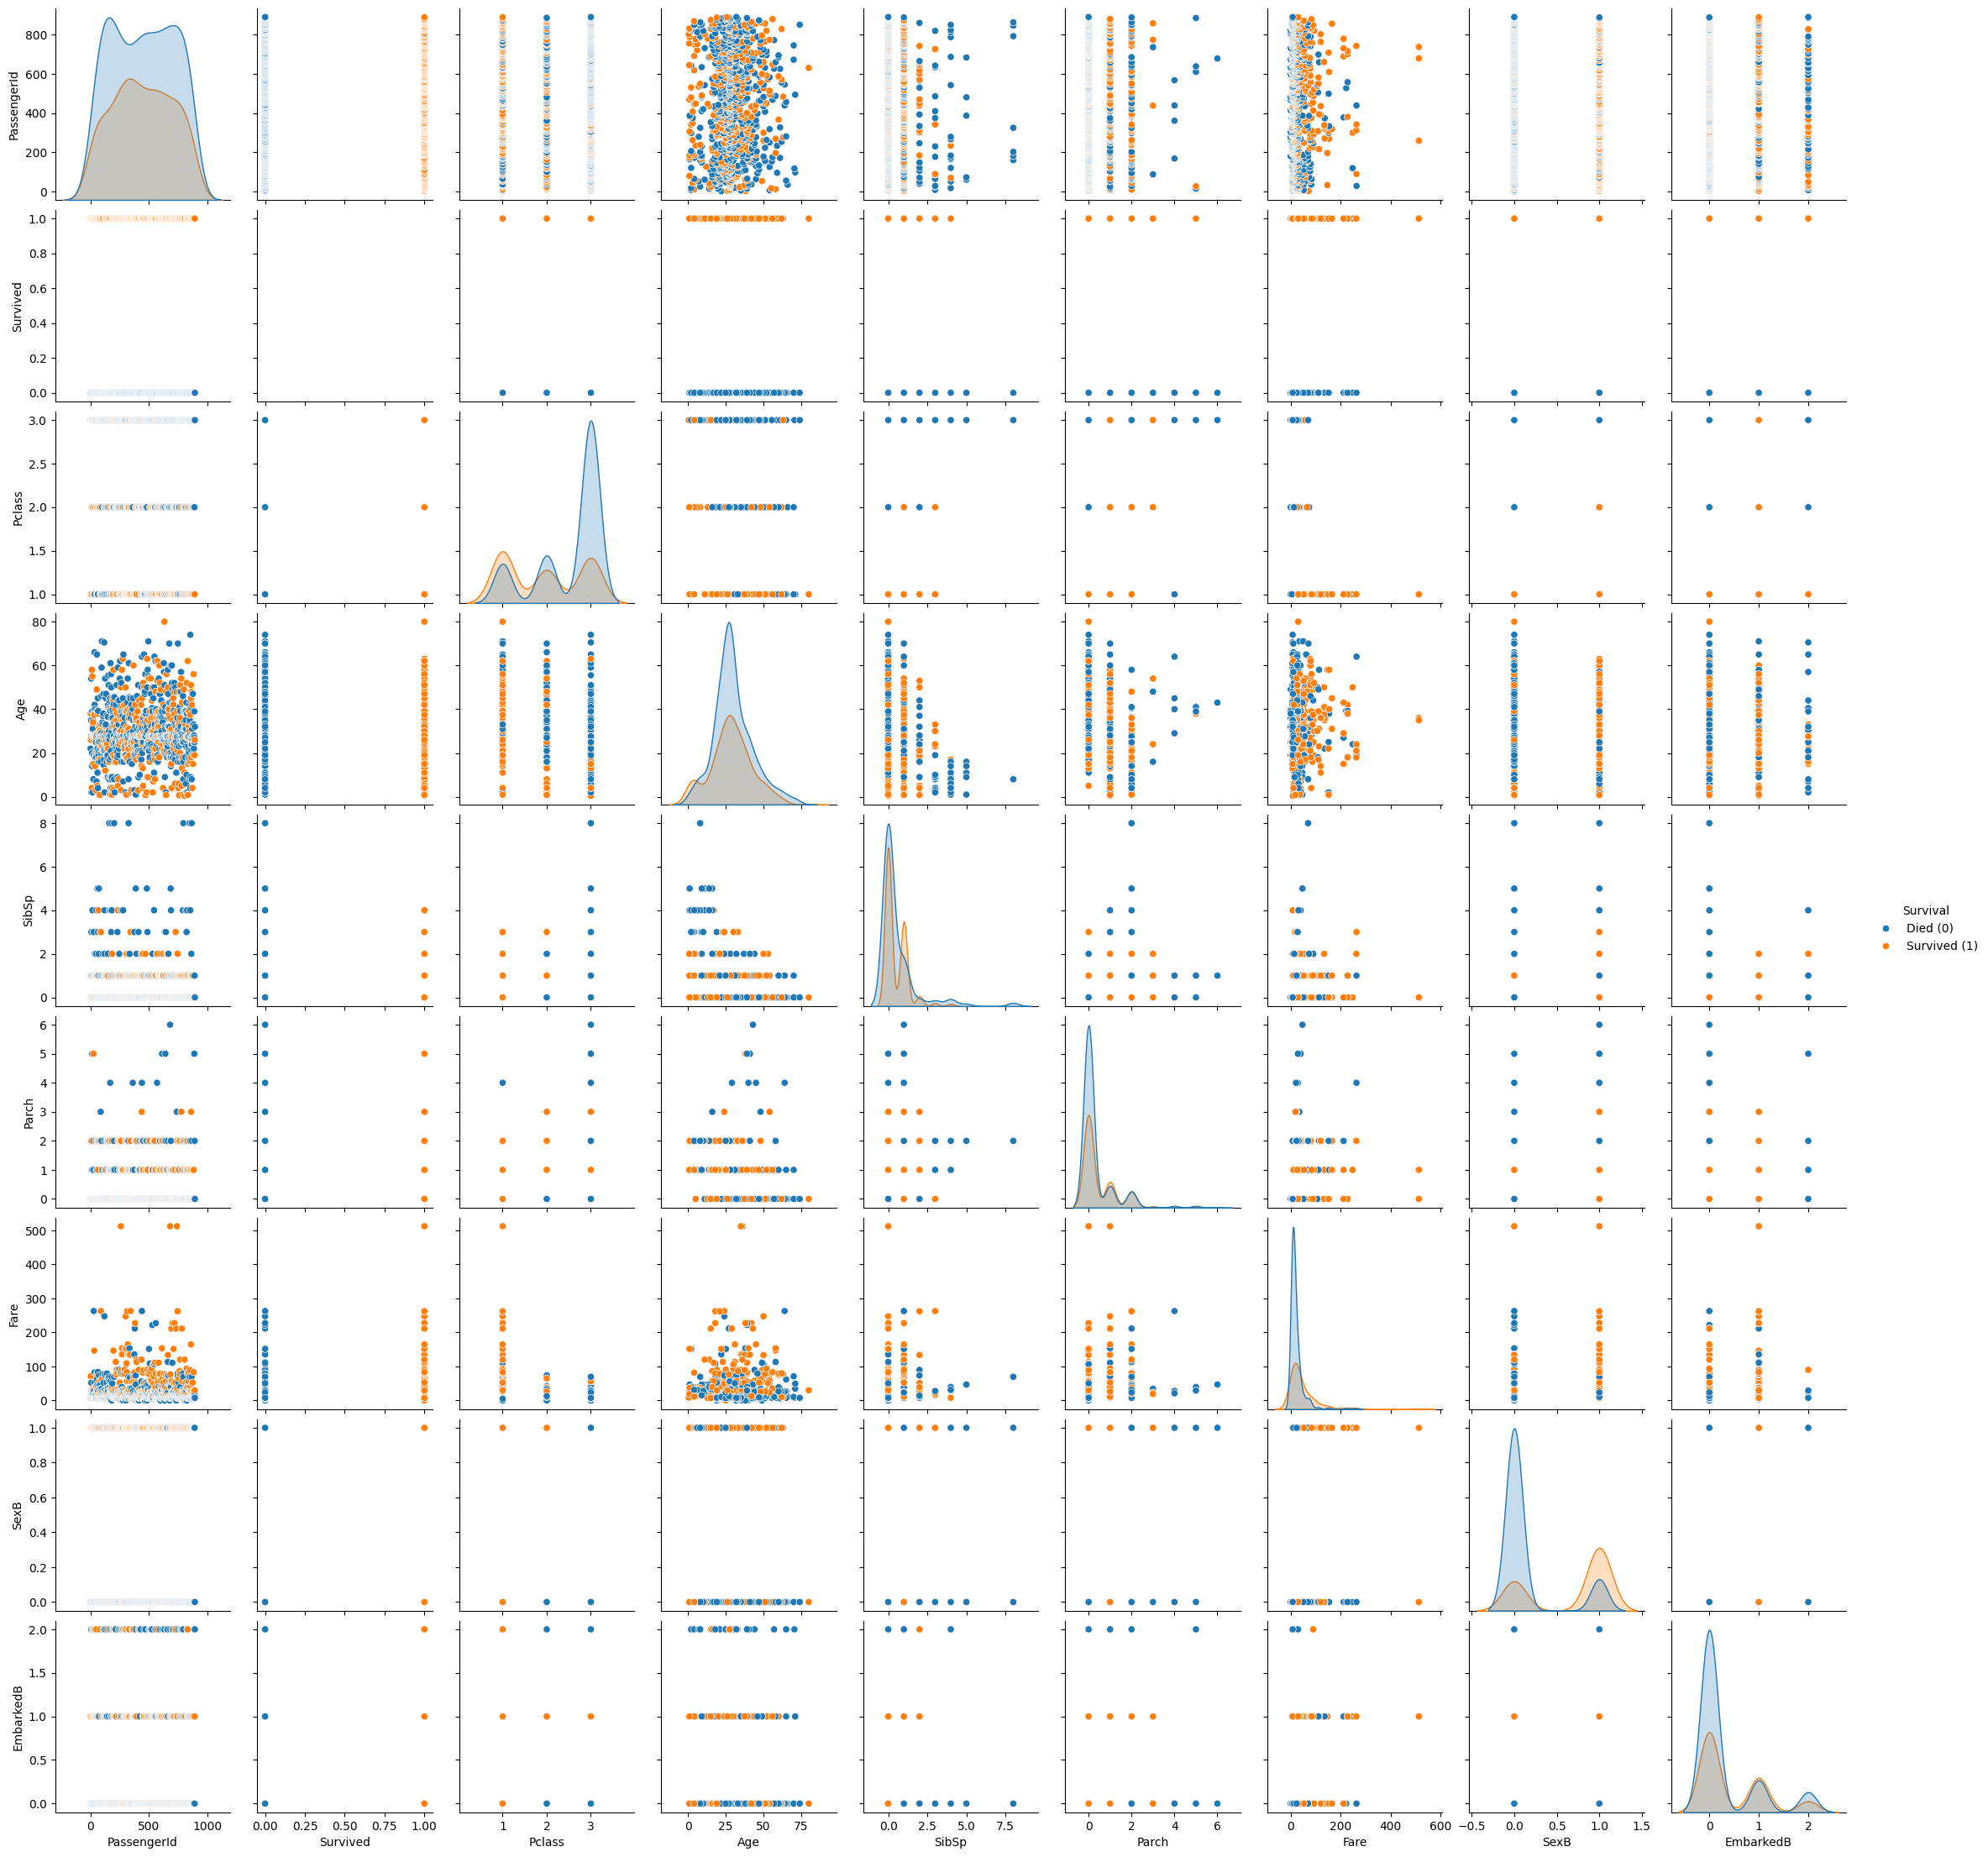

In [275]:
#To make the plot clearer we get add a column to act as a key:
# Create a dictionary to map survival
survived_dict = {0: 'Died (0)', 1: 'Survived (1)'}

# Create a new column 'Survival' by mapping the 'survived' column using the dictionary
df_train['Survival'] = df_train['Survived'].map(survived_dict)

# Create a pairplot
sns.pairplot(df_train, hue='Survival')

# Show the plot
plt.show()

## Machine learning model

So from our assessment above, lets remove some columns from the training data that we don't need.

In [276]:
#Remove unneeded columns to determine Titanic survival rates
train_data.drop(['Name', 'Ticket', "Cabin"], axis = 1, inplace = True)

train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


Assign the survived data to a separate column as the target class, and the other aspects as features of the data.

In [522]:
#Assign features and classes to x, y values
#x: features (Independent Variables)
#y: target classes (Dependent Variables)
features = ["Sex", "Fare", "SibSp", "Pclass", "Age",]
x = train_data[features]
y = train_data["Survived"]

#Convert non-numeric values to a numeric value
x = pd.get_dummies(x)

#Print the shape to enusre it worked
print(x.shape)
print(y.shape)

(891, 6)
(891,)


Split the data into training and testing, so we can see how the model performs.

In [523]:
#Split the data into training and test sets
#test_size: 30% of the total data (test_size=0.3)
#random_state: Ensures reproducibility of the splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

print(x_train.shape)
print(y_train.shape)

(623, 6)
(623,)


Create a model using a random forest classifier, as we need to know if people died or survived, therefore a distinct result, and a random forest tests many decision trees.

In [532]:
#Create model
model = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=101)

#Train Model
model.fit(x_train, y_train)

#Make predictions
predictions = model.predict(x_test)

#Calculate the percentage correct
results = pd.DataFrame(y_test)
results["Prediction"] = predictions
results["Results"] = np.where(results["Survived"] == results["Prediction"],1,0)
round((results["Results"].sum()/results["Results"].count())*100,1)


83.6

## Imporving the model

There are a number of ways to improve a machine learning model. 

### Max depth

Test different maximum depths of a forest.

Define a function to allow me to vary different parameters and test what happens if we change these.

In [526]:
#Define a function for testing different depth of the forest
def get_result(max_depth, x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=101)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    results = pd.DataFrame(y_test)
    results["Prediction"] = predictions
    results["Results"] = np.where(results["Survived"] == results["Prediction"],1,0)
    res = round((results["Results"].sum()/results["Results"].count())*100,2)
    return(res)

In [531]:
#compare res with differing values of max_depth
for max_depth in [14, 15, 16, 17, 18]:
    my_res = get_result(max_depth, x_train, x_test, y_train, y_test)
    print("Max depth: ", max_depth, "\t\tResult: ", my_res)

Max depth:  14 		Result:  83.21
Max depth:  15 		Result:  83.21
Max depth:  16 		Result:  83.58
Max depth:  17 		Result:  83.21
Max depth:  18 		Result:  83.58


On the first run a decision tree with a max depth of 5 gave as good a result as 25 or higher depths. As only running with a max depth of 5 would be more efficient this can be used. 

I then ran the model with number from 3 to 10 to see if there were any other depths which would help, and 4 came out as even more efficient. 

### Feature importance

Feature importance will show how critical each feature is to determining the result. However when I was running it all I was getting was NaN values, and I could not work out why. So I adjust the function I used for max depth above for features and tested it out.

Now test the features in the model, set up a definition to test out features.

In [533]:
#Define a function for testing different features in the forest
def get_result_estimators(features, x_train, x_test, y_train, y_test):
    #Assign features and classes to x, y values
    #x: features (Independent Variables)
    #y: target classes (Dependent Variables)
    x = train_data[features]
    y = train_data["Survived"]

    #Convert non-numeric values to a numeric value
    x = pd.get_dummies(x)

    #Split the data into training and test sets
    #test_size: 30% of the total data (test_size=0.3)
    #random_state: Ensures reproducibility of the splits
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

    model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=101)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    results = pd.DataFrame(y_test)
    results["Prediction"] = predictions
    results["Results"] = np.where(results["Survived"] == results["Prediction"],1,0)
    res = round((results["Results"].sum()/results["Results"].count())*100,1)
    return(res)

Use the fuction and a for loop to run through the different features individually to see how good they are at determining survival.

In [534]:
#compare results with differing features
for features in ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]:
    my_res = get_result_estimators(features, x_train, x_test, y_train, y_test)
    print("Feature:", features, "\t\tResult: ", my_res)

Feature: Pclass 		Result:  66.4
Feature: Sex 		Result:  76.5
Feature: Age 		Result:  56.3
Feature: SibSp 		Result:  60.8
Feature: Parch 		Result:  60.1
Feature: Fare 		Result:  57.5
Feature: Embarked 		Result:  61.6


Sex and Pclass appear to be the strongest two features determining if you survived.

Tested out adding multiple features together, playing around with the order to get the result the highest with fewer features.

In [535]:
features = ["Sex", "Fare", "SibSp", "Pclass", "Age", "Parch","Embarked"]
#compare results with differing features
for i in range(1,len(features)+1):
    feature = features[0:i]
    my_res = get_result_estimators(feature, x_train, x_test, y_train, y_test)
    print("Feature:", feature, "\tResult: ", my_res)

Feature: ['Sex'] 	Result:  76.5
Feature: ['Sex', 'Fare'] 	Result:  79.9
Feature: ['Sex', 'Fare', 'SibSp'] 	Result:  78.4
Feature: ['Sex', 'Fare', 'SibSp', 'Pclass'] 	Result:  78.7
Feature: ['Sex', 'Fare', 'SibSp', 'Pclass', 'Age'] 	Result:  82.1
Feature: ['Sex', 'Fare', 'SibSp', 'Pclass', 'Age', 'Parch'] 	Result:  80.2
Feature: ['Sex', 'Fare', 'SibSp', 'Pclass', 'Age', 'Parch', 'Embarked'] 	Result:  79.5


Some notes from changing the order of the features:
- Sex combined with Fare gives you the highest accuracy with just two features.
- While Embarked and Parch have around a 60% accuracy on their own, they appear to work badly with the other features and reduce down the accuracy when combined.
- To get to the highest accuracy of 82.1%, SibSp has to come before Pclass, which has to come before Age. Interestingly the order of the features has an effect.

### Random search

Sklean has a function that can help tune the hyperparameters of the model and help us get to a more accurate model faster. This is a more efficient way than I was doing above with a function to find my max depth. It is called Ramdomised search CV.

First we can look at the features currently used in my model.

In [536]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}


Now we create a random grid of different features that we want to change.

In [538]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 20, num = 16)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


Use the random grid search to run through different parameters for the model testing out the best parameters.

In [539]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
147 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=16,
                                                    random_state=101),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 14, 15, 16, 17,
                                                      18, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=101, verbose=2)

Print out the best parameters

In [544]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

Compare the improved model against the old model

In [546]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    results = pd.DataFrame(y_test)
    results["Prediction"] = predictions
    results["Results"] = np.where(results["Survived"] == results["Prediction"],1,0)
    accuracy = round((results["Results"].sum()/results["Results"].count())*100,1)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=101)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.2052 degrees.
Accuracy = 83.60%.
Model Performance
Average Error: 0.2052 degrees.
Accuracy = 79.90%.
Improvement of -4.43%.


In [398]:
# view the feature scores

feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

Pclass       NaN
Age          NaN
SibSp        NaN
Parch        NaN
Fare         NaN
Sex_female   NaN
Sex_male     NaN
Embarked_C   NaN
Embarked_Q   NaN
Embarked_S   NaN
dtype: float64

In [549]:

features = ["Sex", "Fare", "SibSp", "Pclass", "Age"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=101)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
